In [1]:
import pandas as pd
import numpy as np
import keras
#we will use keras for the neural network development...

In [2]:
#using dataset mnist

from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
#to flatten the image into one-dimensional vector
num_pixels=x_train.shape[1]*x_train.shape[2]
x_train=x_train.reshape(x_train.shape[0],num_pixels).astype('float')
x_test=x_test.reshape(x_test.shape[0],num_pixels).astype('float')

In [7]:
num_pixels

784

In [8]:
x_train.shape

(60000, 784)

In [9]:
import cv2
cv2.imshow('image',x_train[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
x_test.shape

(10000, 784)

In [11]:
#to normalize 
x_train=x_train/255
x_test=x_test/255

In [12]:
#one hot encoding
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [18]:
x_train.shape


(60000, 784)

In [13]:
y_train.shape

(60000, 10)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:
#train and test the model
model=classification_model()

In [17]:
#training the model
model.fit(x_train,y_train,epochs=10,verbose=1)


Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1862 - accuracy: 0.9434
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0777 - accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0538 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0399 - accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0324 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0263 - accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0208 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0197 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0180 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 

In [19]:
#to save the model
model.save('handwritten_digit_recognition')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: handwritten_digit_recognition\assets


In [20]:
#to load the saved model 
from keras.models import load_model

In [21]:
model=load_model('handwritten_digit_recognition')

In [22]:
#testing the model
y_pred=model.predict(x_test)

In [23]:
#reverse of to_categorical
np.argmax(y_pred,axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
#importing mean_square_error as the evaluation metric
from sklearn.metrics import accuracy_score 

ModuleNotFoundError: No module named 'numpy.testing.nosetester'

In [23]:
mse(y_pred,y_test)

0.0034963686

## now by taking our own image

In [4]:
#open-source computer vision library 
import cv2

In [5]:
#to read an image and convert it into the matrix form
image_2=cv2.imread('C:/Users/sudhanshu/desktop/two_2.jpg')

In [6]:
#to view the image 
cv2.imshow('two',image_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
dim=(28,28)

In [14]:
lower=np.array([80,80,80])
upper=np.array([255,255,255])

In [15]:
#to convert the image from BGR to hue-saturation-value
image2_hsv=cv2.cvtColor(image_2,cv2.COLOR_BGR2HSV)

In [16]:
#for colour filtering 
image2_mask=cv2.inRange(image2_hsv,lower,upper)

In [27]:
cv2.imshow('two_mask',image2_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
#to change the dimension of the image to (28,28)
image2_reduced=cv2.resize(image2_mask,dim)

In [19]:
cv2.imshow('two',image2_reduced)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
image2_new=image2_reduced.reshape(1,image2_reduced.shape[0]*image2_reduced.shape[1])

In [22]:
y_pred=model.predict(image2_new)

In [23]:
#reverse of to_categorical
np.argmax(y_pred,axis=1)

array([2], dtype=int64)

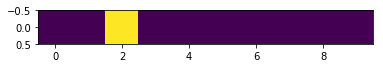

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(y_pred)

In [130]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [131]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [132]:
x_test.shape

(10000, 28, 28)

In [133]:
x_test[4].shape

(28, 28)

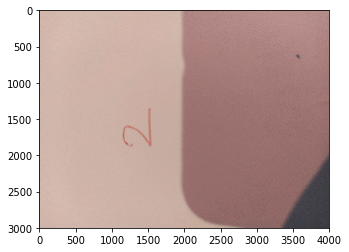

In [139]:
plt.imshow(image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [136]:
image=cv2.imread("C:/Users/Sudhanshu/desktop/two.jpg")

In [142]:
from keras.models import load_model

In [143]:
new_model=load_model('handwritten_digit_recognition')

In [145]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

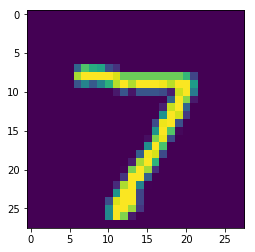

In [151]:
plt.imshow(x_test[0])

In [160]:
img=cv2.imread('C:/Users/sudhanshu/opencv_frame_0.png',cv2.IMREAD_COLOR)

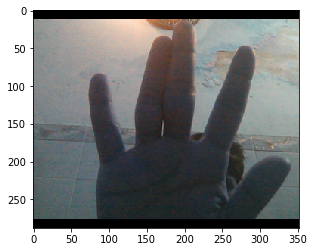

In [162]:

plt.imshow(img)

In [182]:
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

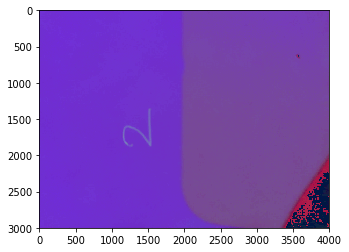

In [183]:
plt.imshow(hsv)

In [184]:
mask2= cv2.inRange(image,np.array([2,50,60]),np.array([125,150,255]))

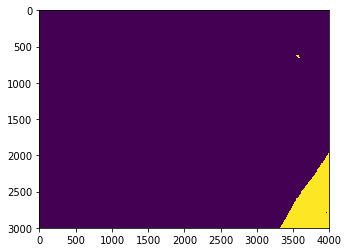

In [185]:
plt.imshow(mask2)

In [188]:
image2=cv2.imread('C:/Users/Sudhanshu/desktop/two_2.jpg')

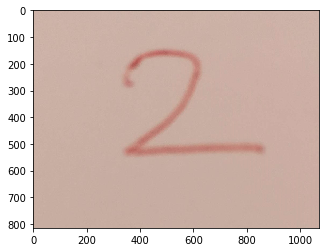

In [189]:
plt.imshow(image2)

In [192]:
hsv=cv2.cvtColor(image2,cv2.COLOR_BGR2HSV)

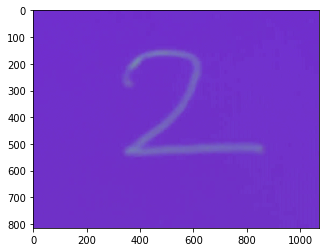

In [195]:
plt.imshow(hsv)

In [193]:
mask2= cv2.inRange(image2,np.array([2,50,60]),np.array([125,150,255]))

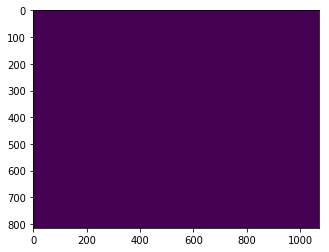

In [194]:
plt.imshow(mask2)

In [196]:
cv2.imshow('image',x_test[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [198]:
image3=cv2.resize(image2,(28,28))

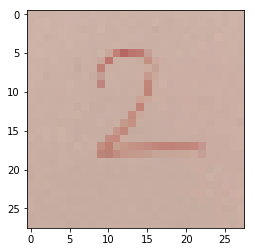

In [199]:
plt.imshow(image3)

In [205]:
image2.shape

(815, 1071, 3)

In [206]:
mask2.shape

(815, 1071)

In [213]:
image4=cv2.cvtColor(image2,cv2.COLOR_BGR2HSV)

error: OpenCV(4.1.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x3b52564f::Set<3,-1,-1>,struct cv::impl::A0x3b52564f::Set<0,5,-1>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [209]:
a=cv2.bitwise_and(image2,mask2)

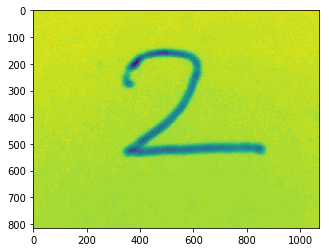

In [214]:
plt.imshow(image2)

In [215]:
image3=cv2.cvtColor(image2,cv2.COLOR_BGR2HSV)

error: OpenCV(4.1.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x3b52564f::Set<3,-1,-1>,struct cv::impl::A0x3b52564f::Set<0,5,-1>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
